# Анализ данных с Pandas

In [1]:
import pandas as pd
import numpy as np

## Структура

In [2]:
q = pd.DataFrame(data={'a': ['abc', 'bcd', 'def'], 'b': [1,2,3], 'c': [100, 300, 200]}, index=[8,9,10])
q

,a,b,c
8,abc,1,100
9,bcd,2,300
10,def,3,200


In [3]:
q.index

Index([8, 9, 10], dtype='int64')

In [4]:
q.columns

Index(['a', 'b', 'c'], dtype='object')

In [5]:
q.a

,a
8,abc
9,bcd
10,def


In [6]:
q['a']

,a
8,abc
9,bcd
10,def


In [7]:
type(q.a)

pandas.core.series.Series

In [9]:
q[:2]

,a,b,c
8,abc,1,100
9,bcd,2,300


In [10]:
q[ ['a', 'b'] ]

,a,b
8,abc,1
9,bcd,2
10,def,3


In [11]:
q[['a', 'b']][:2]

,a,b
8,abc,1
9,bcd,2


## Чтение и просмотр

Данные соцопросов Census Income, с которыми будем работать:

In [12]:
df = pd.read_csv('https://raw.githubusercontent.com/yakushinav/omo/main/data/adult_data.csv')

* __age__: continuous.
* __workclass__: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* __fnlwgt__: continuous.
* __education__: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* __education-num__: continuous.
* __marital-status__: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* __occupation__: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* __relationship__: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* __race__: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* __sex__: Female, Male.
* __capital-gain__: continuous.
* __capital-loss__: continuous.
* __hours-per-week__: continuous.
* __native-country__: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

`head()` показывает первые 5 строк датафрейма.

`tail()` - последние 5.

`head(N)` показывает первые N строк датафрейма.

`tail(N)` - последние N.

In [13]:
df.head(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


## Общее

Размер:

In [14]:
df.shape

(32561, 15)

Столбцы:

In [15]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

Информация содержит данные о типе колонок, степени их заполненности (в нашем случае пропусков в данных нет), типе данных каждой из колонок, а также потреблении памяти:

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Метод `describe` содержит основные статистики по числовым столбцам данных:
* количество
* среднее
* среднеквадратичное отклонение
* минимум, максимум
* медиану
* первый и третий квартили

In [18]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Если хочется посмотреть и на нечисловые признаки, то нужно указать их тип в параметре `include`. Всего есть совсем немного основных:
* `bool` - логический
* `object` - общий нечисловой, в большинстве случаев это строки
* `numeric` - числовой, включающий как числа с плавающей запятой, так и целые

In [19]:
df.describe(include=['object', 'bool'])

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,salary
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


Полезным методом является `value_counts()`, считающим распределение данных по категориям:

In [20]:
df.education.value_counts()

,count
education,
HS-grad,10501
Some-college,7291
Bachelors,5355
Masters,1723
Assoc-voc,1382
11th,1175
Assoc-acdm,1067
10th,933
7th-8th,646


Для отображения в долях существует флажок `normalize`:

In [21]:
df.education.value_counts(normalize=True)

,proportion
education,
HS-grad,0.322502
Some-college,0.223918
Bachelors,0.164461
Masters,0.052916
Assoc-voc,0.042443
11th,0.036086
Assoc-acdm,0.032769
10th,0.028654
7th-8th,0.019840


Можно строить простые диаграммы

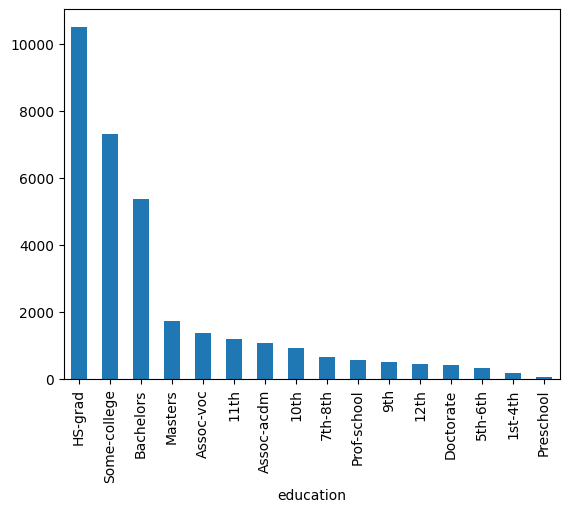

In [22]:
df.education.value_counts().plot.bar(); #(kind='bar');

## Индексация и фильтры

Весь датафрейм:

In [23]:
print(df)

       age         workclass  fnlwgt   education  education-num  \
0       39         State-gov   77516   Bachelors             13   
1       50  Self-emp-not-inc   83311   Bachelors             13   
2       38           Private  215646     HS-grad              9   
3       53           Private  234721        11th              7   
4       28           Private  338409   Bachelors             13   
...    ...               ...     ...         ...            ...   
32556   27           Private  257302  Assoc-acdm             12   
32557   40           Private  154374     HS-grad              9   
32558   58           Private  151910     HS-grad              9   
32559   22           Private  201490     HS-grad              9   
32560   52      Self-emp-inc  287927     HS-grad              9   

           marital-status         occupation   relationship   race     sex  \
0           Never-married       Adm-clerical  Not-in-family  White    Male   
1      Married-civ-spouse    Exec-manag

Только те, чей возраст меньше 25 лет, но больший 10:

In [24]:
df[(df.age < 25) & (df.age > 10)]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
12,23,Private,122272,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Female,0,0,30,United-States,<=50K
26,19,Private,168294,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
30,23,Local-gov,190709,Assoc-acdm,12,Never-married,Protective-serv,Not-in-family,White,Male,0,0,52,United-States,<=50K
31,20,Private,266015,Some-college,10,Never-married,Sales,Own-child,Black,Male,0,0,44,United-States,<=50K
34,22,State-gov,311512,Some-college,10,Married-civ-spouse,Other-service,Husband,Black,Male,0,0,15,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32512,20,Private,270436,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States,<=50K
32527,22,Private,203715,Some-college,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States,<=50K
32535,22,Private,325033,12th,8,Never-married,Protective-serv,Own-child,Black,Male,0,0,35,United-States,<=50K
32555,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K


Только те, кто получают больше 50 000$:

In [25]:
df[df.salary == '>50K']

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32539,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32545,39,Local-gov,111499,Assoc-acdm,12,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,20,United-States,>50K
32554,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


In [26]:
df[df.salary == '<=50K'].sex.value_counts(normalize=False)

,count
sex,
Male,15128
Female,9592


In [27]:
df[df.salary == '>50K'].sex.value_counts(normalize=True)

,proportion
sex,
Male,0.849637
Female,0.150363


## Сортировка

In [28]:
df.sort_values(by=['education'])

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
5843,18,Private,50879,10th,6,Never-married,Other-service,Own-child,White,Male,0,0,6,United-States,<=50K
20930,18,?,184416,10th,6,Never-married,?,Own-child,Black,Male,0,0,30,United-States,<=50K
27263,28,Private,66434,10th,6,Never-married,Other-service,Unmarried,White,Female,0,0,15,United-States,<=50K
31772,17,?,256173,10th,6,Never-married,?,Own-child,White,Female,0,0,15,United-States,<=50K
30608,41,Private,202872,10th,6,Married-spouse-absent,Craft-repair,Not-in-family,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25866,55,Self-emp-inc,182273,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
7509,22,Private,102684,Some-college,10,Never-married,Transport-moving,Not-in-family,White,Male,0,0,32,United-States,<=50K
7507,29,Self-emp-not-inc,337505,Some-college,10,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,South,<=50K
14395,42,Local-gov,201723,Some-college,10,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,United-States,<=50K


Отсортируем сначала по полу, внутри пола - по возрасту, но в обратном порядке

In [29]:
df.sort_values(by=['sex', 'age'], ascending=[True, False])

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
1040,90,Private,137018,HS-grad,9,Never-married,Other-service,Not-in-family,White,Female,0,0,40,United-States,<=50K
2891,90,Private,171956,Some-college,10,Separated,Adm-clerical,Own-child,White,Female,0,0,40,Puerto-Rico,<=50K
4109,90,?,256514,Bachelors,13,Widowed,?,Other-relative,White,Female,991,0,10,United-States,<=50K
5272,90,Private,141758,9th,5,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
8963,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30927,17,Private,108470,11th,7,Never-married,Other-service,Own-child,Black,Male,0,0,17,United-States,<=50K
31131,17,Private,277541,11th,7,Never-married,Sales,Own-child,White,Male,0,0,5,United-States,<=50K
31439,17,Private,375657,11th,7,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,30,United-States,<=50K
32282,17,Private,311907,11th,7,Never-married,Other-service,Own-child,White,Male,0,0,25,United-States,<=50K


## Применение функций

Применить функцию к каждому столбцу или каждой строке можно с помощью `apply`:

In [30]:
t = pd.DataFrame(data = {'a': [1,2,3], 'b': [4,5,6]})
t

,a,b
0,1,4
1,2,5
2,3,6


In [31]:
t['c'] = t.apply(lambda row: row['a'] + row['b'], axis=1) # построчно

In [32]:
t

,a,b,c
0,1,4,5
1,2,5,7
2,3,6,9


Применение функции к каждой __ячейке__ реализовывается с помощью `map`:

In [33]:
renaming = {'>50K': 1, '<=50K': 0}
df.salary = df.salary.map(renaming)

In [34]:
df.salary.value_counts()

,count
salary,
0,24720
1,7841


In [35]:
renaming = {1:'> 50K', 0: '<= 50K'}
df.salary = df.salary.map(renaming)

__apply__ к нескольким столбцам сразу называется __applymap__:

In [36]:
df['sex'] = df['sex'].apply(lambda x: x.lower())
df['relationship'] = df['relationship'].apply(lambda x: x.lower())

In [37]:
# same as above:
cols = ['sex', 'relationship']
df[cols] = df[cols].applymap(lambda x: x.lower())

<ipython-input-37-5139c014da13>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[cols] = df[cols].applymap(lambda x: x.lower())


У строковых столбцов есть хитрое поле __str__, которое возвращает наружу как будто строку (синтаксис тот же), но применяет к каждому элементу столбца.

При больших объемах данных это будет быстрее, потому что `.str` под капотом векторизует операции со строками. Для дат можно использовать `.dt`.

In [38]:
df.sex.apply(lambda x: x.upper());

In [39]:
# same as above
df.sex.str.upper();

## Дубликаты

In [40]:
q = pd.DataFrame(data={'a': [1,2,3,1,1], 'b': [1,2,3,2,1], 'c':[10,20,30,40,40]})
q

,a,b,c
0,1,1,10
1,2,2,20
2,3,3,30
3,1,2,40
4,1,1,40


In [41]:
q.duplicated(['a'])

,0
0,False
1,False
2,False
3,True
4,True


In [42]:
q.duplicated(['a', 'b']) # - уже оценивает кортежи значений из нескольких колонок

,0
0,False
1,False
2,False
3,False
4,True


In [43]:
q.drop_duplicates(subset=['a'])

,a,b,c
0,1,1,10
1,2,2,20
2,3,3,30


In [44]:
q.drop_duplicates(subset=['a', 'b'])

,a,b,c
0,1,1,10
1,2,2,20
2,3,3,30
3,1,2,40


## Группировка

In [45]:
df.groupby(['salary']);

__Важно__: groupby-объекты - не копии частей датафрейма!

In [46]:
df.groupby(['salary']).describe(include=['object', 'bool'])

workclass                        education                          \
           count unique      top   freq     count unique        top  freq   
salary                                                                      
<= 50K     24720      9  Private  17733     24720     16    HS-grad  8826   
> 50K       7841      7  Private   4963      7841     15  Bachelors  2221   

       marital-status         ...   race           sex                      \
                count unique  ...    top   freq  count unique   top   freq   
salary                        ...                                            
<= 50K          24720      7  ...  White  20699  24720      2  male  15128   
> 50K            7841      7  ...  White   7117   7841      2  male   6662   

       native-country                               
                count unique            top   freq  
salary                                              
<= 50K          24720     42  United-States  21999  
> 50K            7841     40  United-States   7171  

[2 rows x 32 columns]

In [47]:
df.groupby('salary')

In [48]:
df.sex.value_counts()

,count
sex,
male,21790
female,10771


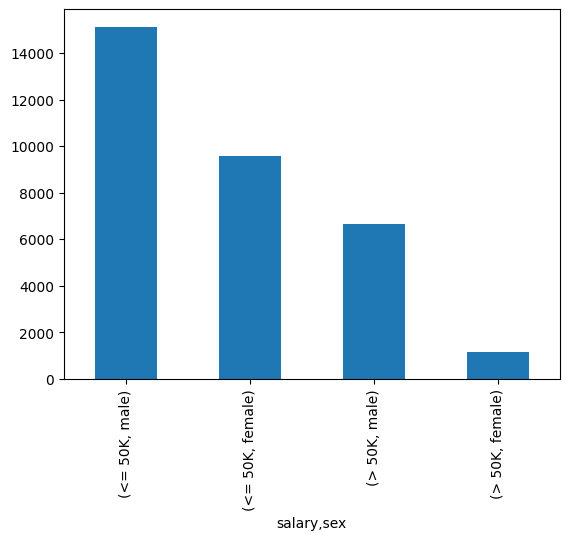

In [49]:
df.groupby('salary').sex.value_counts().plot.bar();

## Таблицы сопряженности и melt

### Таблицы сопряженности

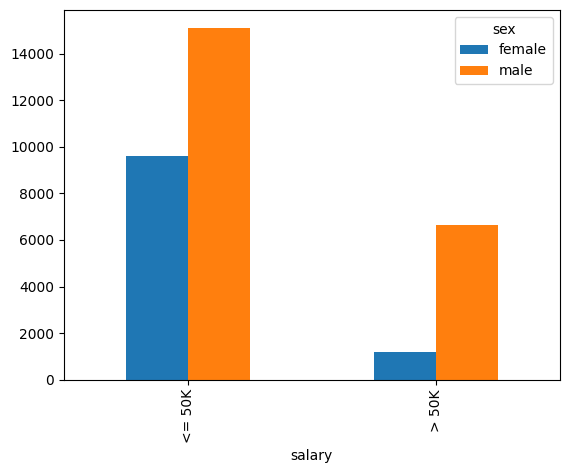

In [50]:
pd.crosstab(df.salary, df.sex).plot(kind='bar');

In [51]:
pd.crosstab(df.salary, df.sex, normalize=True)

sex,female,male
salary,,
<= 50K,0.294586,0.464605
> 50K,0.036209,0.204601


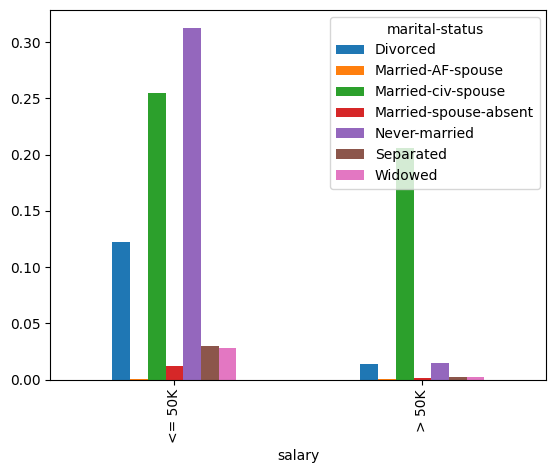

In [52]:
pd.crosstab(df.salary, df['marital-status'], normalize=True).plot.bar();

### Melt - превращение столбцов в строки

In [53]:
t = pd.DataFrame(data={'name': ['PC', 'PlayStation4'],
                   '1W-2014': [100, 300],
                   '2W-2014': [150, 350]})
t

,name,1W-2014,2W-2014
0,PC,100,150
1,PlayStation4,300,350


In [54]:
t2 = pd.melt(t, id_vars=['name'], value_name='cost', var_name='timestamp')
t2

,name,timestamp,cost
0,PC,1W-2014,100
1,PlayStation4,1W-2014,300
2,PC,2W-2014,150
3,PlayStation4,2W-2014,350


## Изменение таблиц

In [55]:
df.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,not-in-family,White,male,2174,0,40,United-States,<= 50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,husband,White,male,0,0,13,United-States,<= 50K


### Добавление нового столбца

In [56]:
df['working_days'] = df['hours-per-week'] / 8.0

In [57]:
df.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,working_days
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,not-in-family,White,male,2174,0,40,United-States,<= 50K,5.000
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,husband,White,male,0,0,13,United-States,<= 50K,1.625


In [58]:
df['constant'] = 1

In [59]:
df = df.assign(anotherConstant = lambda dataframe: dataframe.constant*2)

In [60]:
df.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,working_days,constant,anotherConstant
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,not-in-family,White,male,2174,0,40,United-States,<= 50K,5.000,1,2
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,husband,White,male,0,0,13,United-States,<= 50K,1.625,1,2


### Удаление строк и столбцов

In [61]:
df.drop(['constant', 'anotherConstant'], axis=1, inplace=True)

__NB__: У большинства операторов pandas есть флажок `inplace`. Если он выставлен в `False` (по умолчанию именно так), то изменения, например, как `drop` в примере выше, не будут изменять таблицу, а вернут измененную копию.

In [62]:
df.drop([1,2]).head(3) # => удаляет строки

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,working_days
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,not-in-family,White,male,2174,0,40,United-States,<= 50K,5.0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,husband,Black,male,0,0,40,United-States,<= 50K,5.0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,wife,Black,female,0,0,40,Cuba,<= 50K,5.0


### loc, iloc

In [63]:
df.loc[0, 'workclass'] # получение конкретной ячейки по индексу и названию столбца

'State-gov'

In [64]:
df.iloc[0, 1] # получение конкретной ячейки по номеру строки и номеру столбца, вне зависимости от индексов

'State-gov'

__Важно__: можно и получать строки по маскам:

In [65]:
df.loc[df.age % 5 == 0, 'workclass'].head()

,workclass
1,Self-emp-not-inc
11,State-gov
14,Private
16,Self-emp-not-inc
20,Private


__Важно__: Основываясь на этом, можно присваивать другим значениям:

In [66]:
df.loc[df.age % 2 == 0, 'workclass'] = 'ЧЕТНЫЙ'

In [67]:
df.loc[:5, 'education'] = 'NO EDUCATION'

In [68]:
df.head(7)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,working_days
0,39,State-gov,77516,NO EDUCATION,13,Never-married,Adm-clerical,not-in-family,White,male,2174,0,40,United-States,<= 50K,5.000
1,50,ЧЕТНЫЙ,83311,NO EDUCATION,13,Married-civ-spouse,Exec-managerial,husband,White,male,0,0,13,United-States,<= 50K,1.625
2,38,ЧЕТНЫЙ,215646,NO EDUCATION,9,Divorced,Handlers-cleaners,not-in-family,White,male,0,0,40,United-States,<= 50K,5.000
3,53,Private,234721,NO EDUCATION,7,Married-civ-spouse,Handlers-cleaners,husband,Black,male,0,0,40,United-States,<= 50K,5.000
4,28,ЧЕТНЫЙ,338409,NO EDUCATION,13,Married-civ-spouse,Prof-specialty,wife,Black,female,0,0,40,Cuba,<= 50K,5.000
5,37,Private,284582,NO EDUCATION,14,Married-civ-spouse,Exec-managerial,wife,White,female,0,0,40,United-States,<= 50K,5.000
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,not-in-family,Black,female,0,0,16,Jamaica,<= 50K,2.000


### Переименование столбцов

In [69]:
df.columns = [c.upper() for c in df.columns]

In [70]:
df.head(1)

,AGE,WORKCLASS,FNLWGT,EDUCATION,EDUCATION-NUM,MARITAL-STATUS,OCCUPATION,RELATIONSHIP,RACE,SEX,CAPITAL-GAIN,CAPITAL-LOSS,HOURS-PER-WEEK,NATIVE-COUNTRY,SALARY,WORKING_DAYS
0,39,State-gov,77516,NO EDUCATION,13,Never-married,Adm-clerical,not-in-family,White,male,2174,0,40,United-States,<= 50K,5.0


In [71]:
df.columns = [c.lower() for c in df.columns]

In [72]:
df = df.rename(columns={'marital-status': 'marital_status'})
                        # словарь старое-новое значение

## Работа с пропущенными (NaN) значениями

In [73]:
test = pd.DataFrame(data={'name': ['John', 'Bill', 'Jennifer', 'Max'],
                          'salary': [90, np.nan, 95, 130],
                          'age': [27, 30, np.nan, np.nan],
                          'status': [np.nan, 'married', np.nan, 'married']
                         })
test = test[['name', 'age', 'salary', 'status']]
test

,name,age,salary,status
0,John,27.0,90.0,NaN
1,Bill,30.0,NaN,married
2,Jennifer,NaN,95.0,NaN
3,Max,NaN,130.0,married


### Отображение

In [74]:
test[test['age'].isnull()]

,name,age,salary,status
2,Jennifer,NaN,95.0,NaN
3,Max,NaN,130.0,married


In [75]:
test[test['age'].notnull()]

,name,age,salary,status
0,John,27.0,90.0,NaN
1,Bill,30.0,NaN,married


In [76]:
test[test.isnull().any(axis=1)] # !

,name,age,salary,status
0,John,27.0,90.0,NaN
1,Bill,30.0,NaN,married
2,Jennifer,NaN,95.0,NaN
3,Max,NaN,130.0,married


In [77]:
test[~test.isnull().any(axis=1)]

,name,age,salary,status


### Заполнение

Прежде всего, можно заполнить некоторым константным значением:

In [78]:
dashtest = test.fillna('-')
dashtest

,name,age,salary,status
0,John,27.0,90.0,-
1,Bill,30.0,-,married
2,Jennifer,-,95.0,-
3,Max,-,130.0,married


Важно заметить, что теперь слобцы возраста и зарплаты более не числовые:

In [79]:
print(test.dtypes, '\n\n', dashtest.dtypes)

name       object
age       float64
salary    float64
status     object
dtype: object 

 name      object
age       object
salary    object
status    object
dtype: object


In [80]:
test.fillna(method='ffill')

<ipython-input-80-794716843cd8>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  test.fillna(method='ffill')


,name,age,salary,status
0,John,27.0,90.0,NaN
1,Bill,30.0,90.0,married
2,Jennifer,30.0,95.0,married
3,Max,30.0,130.0,married


In [81]:
test.fillna(method='bfill')

<ipython-input-81-8dd5aea22d5e>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  test.fillna(method='bfill')


,name,age,salary,status
0,John,27.0,90.0,married
1,Bill,30.0,95.0,married
2,Jennifer,NaN,95.0,married
3,Max,NaN,130.0,married


In [82]:
test.fillna(method='ffill').fillna(method='bfill')

<ipython-input-82-1e8e582cb5e8>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  test.fillna(method='ffill').fillna(method='bfill')


,name,age,salary,status
0,John,27.0,90.0,married
1,Bill,30.0,90.0,married
2,Jennifer,30.0,95.0,married
3,Max,30.0,130.0,married


In [83]:
test['salary'] = test[['salary']].fillna(test.salary.median())
test

,name,age,salary,status
0,John,27.0,90.0,NaN
1,Bill,30.0,95.0,married
2,Jennifer,NaN,95.0,NaN
3,Max,NaN,130.0,married


In [84]:
test['age'] = test[['salary']].fillna(25)
test['status'] = test[['status']].fillna(test.status.mode()[0])
test

,name,age,salary,status
0,John,90.0,90.0,married
1,Bill,95.0,95.0,married
2,Jennifer,95.0,95.0,married
3,Max,130.0,130.0,married


## Краткий конспект

- df.shape - размер
- df.head(N), df.tail(N), - просмотр
- df[массив имен колонок] - часть (slice) датафрейма
- df['имя колонки'] - одна колонка (можно и через точку: df.имя_колонки)
- df.unique, df.nunique - просмотр уникальных значений и их количества
- df.value_counts - сколько разных значений в колонке
- df.имя колонки.apply - применяет функцию к значениям в столбце
- df.fillna - заполняет NaN
- df.dropna - удаляет строки/столбцы с NaN
- df.duplicated - показывает строки, являющиеся дупликатами других
- df.drop_duplicates - удаляет строки-дупликаты
- df[df.isnull().any(axis=1)] - вывести строки, содержащие NaN
- df[df.имя колонки.isnull().any(axis=1)] - вывести только те строки, где в указанной колонке есть пропуски
- df.groupby - группировка по некоторому признаку

## Задание

**1.** Загрузите csv-файл `https://raw.githubusercontent.com/yakushinav/omo/main/data/fishing.csv` в переменную fishing_data. Описание данных см. [здесь](https://github.com/yakushinav/journ/blob/main/fishing.md).

In [85]:
import pandas as pd

url = "https://raw.githubusercontent.com/yakushinav/omo/main/data/fishing.csv"
fishing_data = pd.read_csv(url)

print(fishing_data.head())

   Unnamed: 0     mode    price   catch   pbeach    ppier    pboat  pcharter  \
0           1  charter  182.930  0.5391  157.930  157.930  157.930   182.930   
1           2  charter   34.534  0.4671   15.114   15.114   10.534    34.534   
2           3     boat   24.334  0.2413  161.874  161.874   24.334    59.334   
3           4     pier   15.134  0.0789   15.134   15.134   55.930    84.930   
4           5     boat   41.514  0.1082  106.930  106.930   41.514    71.014   

   cbeach   cpier   cboat  ccharter     income  
0  0.0678  0.0503  0.2601    0.5391  7083.3317  
1  0.1049  0.0451  0.1574    0.4671  1249.9998  
2  0.5333  0.4522  0.2413    1.0266  3749.9999  
3  0.0678  0.0789  0.1643    0.5391  2083.3332  
4  0.0678  0.0503  0.1082    0.3240  4583.3320  


**2.** Выведите описательные статистики для всех числовых (integer, float) переменных в датафрейме.

In [86]:
numeric_stats = fishing_data.describe(include=['int64', 'float64'])
print(numeric_stats)

        Unnamed: 0        price        catch       pbeach        ppier  \
count  1182.000000  1182.000000  1182.000000  1182.000000  1182.000000   
mean    591.500000    52.081975     0.389368   103.422005   103.422005   
std     341.358316    53.829970     0.560596   103.641042   103.641042   
min       1.000000     1.290000     0.000200     1.290000     1.290000   
25%     296.250000    15.870000     0.036100    26.656500    26.656500   
50%     591.500000    37.896000     0.164300    74.628000    74.628000   
75%     886.750000    67.513000     0.533300   144.144000   144.144000   
max    1182.000000   666.110000     2.310100   843.186000   843.186000   

             pboat     pcharter       cbeach        cpier        cboat  \
count  1182.000000  1182.000000  1182.000000  1182.000000  1182.000000   
mean     55.256570    84.379244     0.241011     0.162224     0.171215   
std      62.713444    63.544650     0.190752     0.160390     0.209789   
min       2.290000    27.290000     0

**3.** Выберите из таблицы только строки, которые соответствуют респондентам, которые выбрали рыбалку на берегу (`beach`).

In [88]:
print(fishing_data.columns)  # Убедимся, что есть нужный столбец (предварительно предполагаем, что mode)
beach_fishers = fishing_data[fishing_data['mode'] == 'beach']  # Для столбца, который называется 'mode'
print(beach_fishers.head())  # Первые несколько строк
print(f"\nВсего респондентов, ловивших на берегу: {len(beach_fishers)}")

Index(['Unnamed: 0', 'mode', 'price', 'catch', 'pbeach', 'ppier', 'pboat',
       'pcharter', 'cbeach', 'cpier', 'cboat', 'ccharter', 'income'],
      dtype='object')
    Unnamed: 0   mode   price   catch  pbeach   ppier    pboat  pcharter  \
6            7  beach  51.934  0.0678  51.934  51.934  191.930   220.930   
14          15  beach  74.514  0.2537  74.514  74.514   74.514    93.014   
16          17  beach  48.114  0.1049  48.114  48.114   33.534    57.534   
25          26  beach  67.784  0.5333  67.784  67.784   17.862    52.862   
33          34  beach   9.522  0.0678   9.522   9.522   78.292   107.292   

    cbeach   cpier   cboat  ccharter     income  
6   0.0678  0.0789  0.1643    0.5391  8750.0010  
14  0.2537  0.1498  0.2339    0.6288  8750.0010  
16  0.1049  0.0451  0.1574    0.4671  5416.6667  
25  0.5333  0.4522  0.2413    1.0266  1249.9998  
33  0.0678  0.0789  0.0014    0.0029  3749.9999  

Всего респондентов, ловивших на берегу: 134


**4.** Выберите из таблицы строки, которые соответствуют респондентам, которые предпочитают рыбачить на лодке (`boat`) с доходом (`income`) ниже 3500. Сохраните результат в переменную `boat_data`.

In [89]:
# Фильтрация по условиям: mode == 'boat' И income < 3500
boat_data = fishing_data[(fishing_data['mode'] == 'boat') & (fishing_data['income'] < 3500)]

print(boat_data.head())  # Вывод первых строк
print(f"\nКоличество подходящих респондентов: {len(boat_data)}")

    Unnamed: 0  mode   price   catch   pbeach    ppier   pboat  pcharter  \
9           10  boat  28.314  0.0233   28.314   28.314  28.314    46.814   
22          23  boat  15.134  0.1665  100.674  100.674  15.134    50.134   
32          33  boat   7.722  0.0023   33.462   33.462   7.722    31.722   
37          38  boat  80.608  0.0531   25.648   25.648  80.608   105.608   
40          41  boat  46.332  0.1643   10.296   10.296  46.332    75.332   

    cbeach   cpier   cboat  ccharter     income  
9   0.2537  0.1498  0.0233    0.0219  2916.6666  
22  0.5333  0.4522  0.1665    0.3975  2083.3332  
32  0.1049  0.0451  0.0023    0.0046  2916.6666  
37  0.2537  0.1498  0.0531    0.0052  1249.9998  
40  0.0678  0.0789  0.1643    0.5391  2916.6666  

Количество подходящих респондентов: 152


**5.** Переименуйте столбец `catch` в `c_rate`.

In [90]:
fishing_data = fishing_data.rename(columns={'catch': 'c_rate'})   # Переименование столбца 'catch' в 'c_rate'
print(fishing_data.head())   # Вывод первых строк для проверки

   Unnamed: 0     mode    price  c_rate   pbeach    ppier    pboat  pcharter  \
0           1  charter  182.930  0.5391  157.930  157.930  157.930   182.930   
1           2  charter   34.534  0.4671   15.114   15.114   10.534    34.534   
2           3     boat   24.334  0.2413  161.874  161.874   24.334    59.334   
3           4     pier   15.134  0.0789   15.134   15.134   55.930    84.930   
4           5     boat   41.514  0.1082  106.930  106.930   41.514    71.014   

   cbeach   cpier   cboat  ccharter     income  
0  0.0678  0.0503  0.2601    0.5391  7083.3317  
1  0.1049  0.0451  0.1574    0.4671  1249.9998  
2  0.5333  0.4522  0.2413    1.0266  3749.9999  
3  0.0678  0.0789  0.1643    0.5391  2083.3332  
4  0.0678  0.0503  0.1082    0.3240  4583.3320  


**6.** Добавьте в таблицу столбец `log_income`, содержащий натуральный логарифм доходов респондентов.

In [92]:
fishing_data['log_income'] = np.log(fishing_data['income'])    # Добавляем столбец log_income = ln(income)
print(fishing_data[['income', 'log_income']].head())    # Проверяем результат
fishing_data.to_csv('fishing_data_with_log_income.csv', index=False)    # Сохранение изменённого датафрейма (опционально)

      income  log_income
0  7083.3317    8.865500
1  1249.9998    7.130899
2  3749.9999    8.229511
3  2083.3332    7.641724
4  4583.3320    8.430182


**7.** Сгруппируйте наблюдения в таблице по признаку тип рыбалки (`mode`) и выведите для каждого типа среднюю цену (`price`), которую респонденты готовы заплатить за рыбалку.

In [93]:
# Группировка по 'mode' и вычисление средней цены
average_price_by_mode = fishing_data.groupby('mode')['price'].mean().round(2).reset_index()
print(average_price_by_mode)   # Вывод результата

      mode  price
0    beach  35.70
1     boat  41.61
2  charter  75.10
3     pier  30.57


**8.** Выведите на экран первые 8 строк таблицы. А теперь последние 8.

In [94]:
print("Первые 8 строк:")
print(fishing_data.head(8))

print("\nПоследние 8 строк:")
print(fishing_data.tail(8))

Первые 8 строк:
   Unnamed: 0     mode    price  c_rate   pbeach    ppier    pboat  pcharter  \
0           1  charter  182.930  0.5391  157.930  157.930  157.930   182.930   
1           2  charter   34.534  0.4671   15.114   15.114   10.534    34.534   
2           3     boat   24.334  0.2413  161.874  161.874   24.334    59.334   
3           4     pier   15.134  0.0789   15.134   15.134   55.930    84.930   
4           5     boat   41.514  0.1082  106.930  106.930   41.514    71.014   
5           6  charter   63.934  0.3975  192.474  192.474   28.934    63.934   
6           7    beach   51.934  0.0678   51.934   51.934  191.930   220.930   
7           8  charter   56.714  0.0209   15.134   15.134   21.714    56.714   

   cbeach   cpier   cboat  ccharter     income  log_income  
0  0.0678  0.0503  0.2601    0.5391  7083.3317    8.865500  
1  0.1049  0.0451  0.1574    0.4671  1249.9998    7.130899  
2  0.5333  0.4522  0.2413    1.0266  3749.9999    8.229511  
3  0.0678  0.0789  

**9.** Сохраните изменённый датафрейм в csv-файл.

In [95]:
# Повтор внесённых изменений:
fishing_data['log_income'] = np.log(fishing_data['income'])  # Добавленный столбец
fishing_data = fishing_data.rename(columns={'catch': 'c_rate'})  # Переименованный столбец

# Сохранение с настройками:
fishing_data.to_csv(
    'fishing_data_final.csv',  # Имя файла
    index=False,               # Не сохранять индексы
    encoding='utf-8',         # Кодировка
    sep=',',                  # Разделитель
    float_format='%.2f'       # Формат чисел
)